In [1]:
import random
import torch
import torch.nn as nn
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import os.path as osp

%matplotlib inline

In [3]:
PATH = './dataset'

bs = 256

img_size = 32

z_size = 100

num_epochs = 500

lr = 0.001

beta1 = 0.5

real_label = 1
fake_label = 0

In [5]:
train_dataset = dset.MNIST(
    root=PATH,
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

data_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=bs,
    shuffle=True,
    drop_last=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 3149182.92it/s]


Extracting E:/GAN/dataset\MNIST\raw\train-images-idx3-ubyte.gz to E:/GAN/dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 147257.57it/s]


Extracting E:/GAN/dataset\MNIST\raw\train-labels-idx1-ubyte.gz to E:/GAN/dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 524566.37it/s]


Extracting E:/GAN/dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to E:/GAN/dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting E:/GAN/dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to E:/GAN/dataset\MNIST\raw



In [6]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.g_fc1 = nn.Linear(in_features=100, out_features=128, bias=True)
        self.g_relu = nn.ReLU(inplace=True)
        self.g_fc2 = nn.Linear(in_features=128, out_features=784, bias=True)
        self.g_sigmoid = nn.Sigmoid()

        nn.init.xavier_uniform_(self.g_fc1.weight, gain=1.0)
        nn.init.xavier_uniform_(self.g_fc2.weight, gain=1.0)

    def forward(self, x):
        x = self.g_fc1(x)
        x = self.g_relu(x)
        x = self.g_fc2(x)
        x = self.g_sigmoid(x)

        return x

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
    
        self.d_fc1 = nn.Linear(in_features=784, out_features=128, bias=True)
        self.d_relu = nn.ReLU(inplace=True)
        self.d_fc2 = nn.Linear(in_features=128, out_features=1, bias=True)
        self.d_sigmoid = nn.Sigmoid()

        nn.init.xavier_uniform_(self.d_fc1.weight, gain=1.0)
        nn.init.xavier_uniform_(self.d_fc2.weight, gain=1.0)

    def forward(self, x):
        x = self.d_fc1(x)
        x = self.d_relu(x)
        x = self.d_fc2(x)
        x = self.d_sigmoid(x)
        return x

In [8]:
model_G = Generator()
model_D = Discriminator()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_G.to(device)
model_D.to(device)
print(model_G)
print(model_D)

Generator(
  (g_fc1): Linear(in_features=100, out_features=128, bias=True)
  (g_relu): ReLU(inplace=True)
  (g_fc2): Linear(in_features=128, out_features=784, bias=True)
  (g_sigmoid): Sigmoid()
)
Discriminator(
  (d_fc1): Linear(in_features=784, out_features=128, bias=True)
  (d_relu): ReLU(inplace=True)
  (d_fc2): Linear(in_features=128, out_features=1, bias=True)
  (d_sigmoid): Sigmoid()
)


In [9]:
criterion = nn.BCELoss()

optimizer_G = torch.optim.Adam(model_G.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = torch.optim.Adam(model_D.parameters(), lr=lr, betas=(beta1, 0.999))

In [10]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
    return fig

[10/500][234/234]	Loss_D: 0.4885	Loss_G: 2.5138
[20/500][234/234]	Loss_D: 0.5841	Loss_G: 2.2303
[30/500][234/234]	Loss_D: 1.1161	Loss_G: 1.8238
[40/500][234/234]	Loss_D: 0.2228	Loss_G: 4.0969
[50/500][234/234]	Loss_D: 0.9244	Loss_G: 2.2357
[60/500][234/234]	Loss_D: 0.6655	Loss_G: 1.9107
[70/500][234/234]	Loss_D: 0.6747	Loss_G: 2.2132
[80/500][234/234]	Loss_D: 0.6511	Loss_G: 2.0346
[90/500][234/234]	Loss_D: 0.6607	Loss_G: 2.5358
[100/500][234/234]	Loss_D: 0.7252	Loss_G: 2.0031
[110/500][234/234]	Loss_D: 0.6699	Loss_G: 1.9714
[120/500][234/234]	Loss_D: 0.6348	Loss_G: 2.6151
[130/500][234/234]	Loss_D: 0.6429	Loss_G: 1.8824
[140/500][234/234]	Loss_D: 0.7402	Loss_G: 2.9107
[150/500][234/234]	Loss_D: 0.6167	Loss_G: 2.2387
[160/500][234/234]	Loss_D: 0.5816	Loss_G: 2.4456
[170/500][234/234]	Loss_D: 0.6224	Loss_G: 2.4473
[180/500][234/234]	Loss_D: 0.4539	Loss_G: 2.9514
[190/500][234/234]	Loss_D: 0.5957	Loss_G: 2.2750
[200/500][234/234]	Loss_D: 0.6265	Loss_G: 2.4605
[210/500][234/234]	Loss_D: 0.

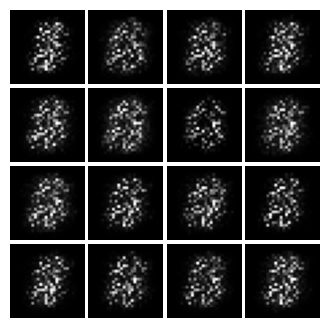

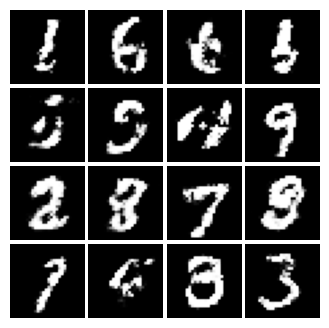

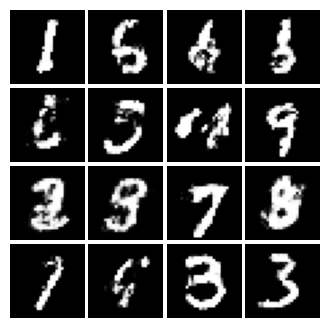

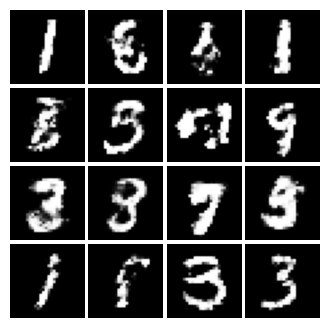

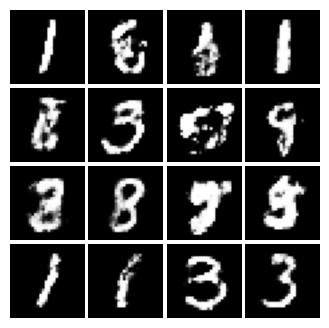

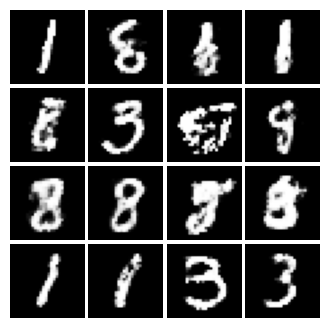

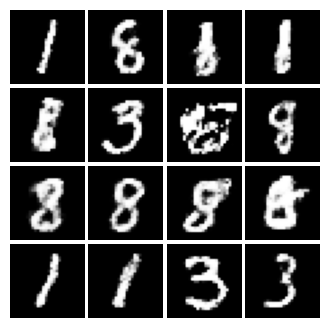

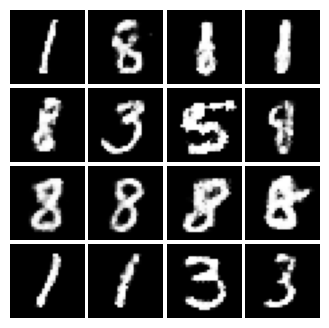

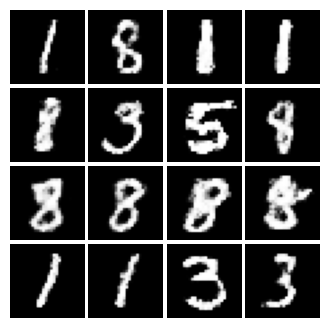

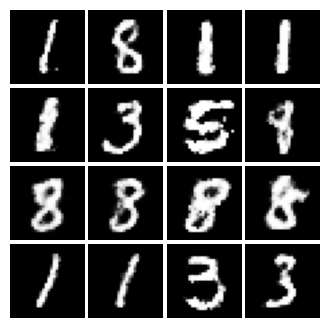

In [11]:
label_real = torch.full((bs,), real_label, device=device, dtype=torch.float)
label_fake = torch.full((bs,), fake_label, device=device, dtype=torch.float)

fixed_noise = torch.randn(bs, z_size, device=device, dtype=torch.float)

for epoch in range(num_epochs):

    model_G.train()
    model_D.train()

    for i, data in enumerate(data_loader):

        data = data[0].to(device)
        data = data.view(bs, -1)

        noise = torch.randn(bs, z_size, device=device, dtype=torch.float)
        fake = model_G(noise)

        #Disciminator Training
        model_D.zero_grad()

        output_real = model_D(data).view(-1)
        err_D_real = criterion(output_real, label_real)

        err_D_real.backward()

        output_fake = model_D(fake.detach()).view(-1)
        err_D_fake = criterion(output_fake, label_fake)

        err_D_fake.backward()

        err_D = err_D_real + err_D_fake
        optimizer_D.step()


        # Generator Training
        model_G.zero_grad()

        output = model_D(fake).view(-1)
        err_G = criterion(output, label_real)

        err_G.backward()
        optimizer_G.step()

    # Output training stats
    if (epoch+1) % 10 == 0:
        print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
              % ((epoch+1), num_epochs, i+1, len(data_loader), err_D.item(), err_G.item()))

    if (epoch) % 50 == 0:
        model_G.eval()
        model_D.eval()
        output = model_G(fixed_noise).detach().cpu().numpy()
        fig = plot(output[:16])


In [12]:
torch.save(model_D.state_dict(),"./model_D_state_dict.pt")
torch.save(model_G.state_dict(),"./model_G_state_dict.pt")

In [14]:
torch.save(model_D, "./model_D.pt")
torch.save(model_G, "./model_G.pt")